In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

In [42]:
# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=2, cluster_std=1)

In [43]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

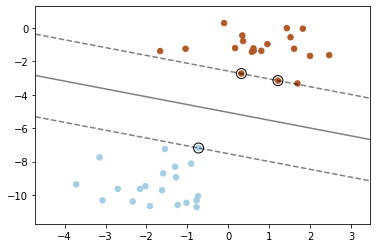

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

In [64]:
# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=2, cluster_std=2.3)

In [65]:
# fit the model, don't regularize for illustration purposes
clf = svm.LinearSVC(C=1000, loss="hinge", random_state=42, dual="auto")
clf.fit(X, y)
decision_function = clf.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X[support_vector_indices]

C:\Users\shfar\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


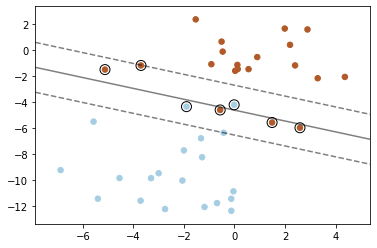

In [66]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    support_vectors[:, 0],
    support_vectors[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

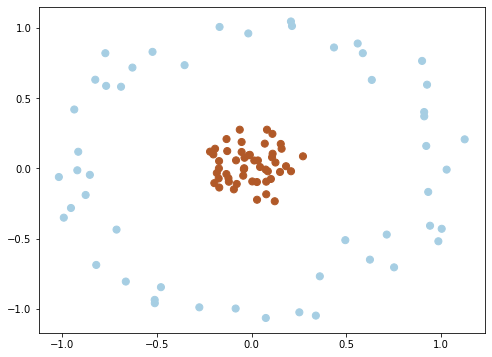

In [91]:
from sklearn.datasets import make_circles
fig = plt.figure(figsize=(8,6))
X, y = make_circles(100, factor=0.1, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

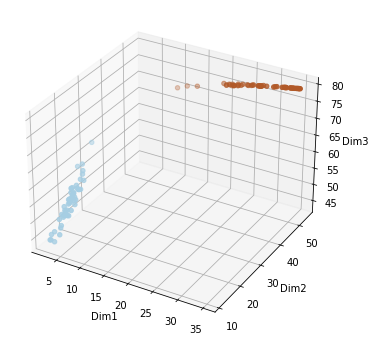

In [88]:
from mpl_toolkits.mplot3d import Axes3D

# Define the Gaussian kernel function
def gaussian_kernel(x1, x2, sigma=0.1):
    return np.exp(-np.linalg.norm(x1 - x2) ** 2 / (2 * (sigma ** 2)))

# Create the higher-dimensional representation of the data using the Gaussian kernel
def transform_to_higher_dim(X):
    n_samples = X.shape[0]
    transformed_X = np.zeros((n_samples, 3))

    for i in range(n_samples):
        for j in range(n_samples):
            transformed_X[i, 0] += gaussian_kernel(X[i], X[j], sigma=0.2)
            transformed_X[i, 1] += gaussian_kernel(X[i], X[j], sigma=0.5)
            transformed_X[i, 2] += gaussian_kernel(X[i], X[j], sigma=1)

    return transformed_X

# Transform the data to a higher dimension
X_higher_dim = transform_to_higher_dim(X)


# plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_higher_dim[:, 0], X_higher_dim[:, 1], X_higher_dim[:, 2], c=y, cmap=plt.cm.Paired)
ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
ax.set_zlabel('Dim3')
plt.show()


In [86]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

In [85]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=150, linewidth=1, color = 'k', facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

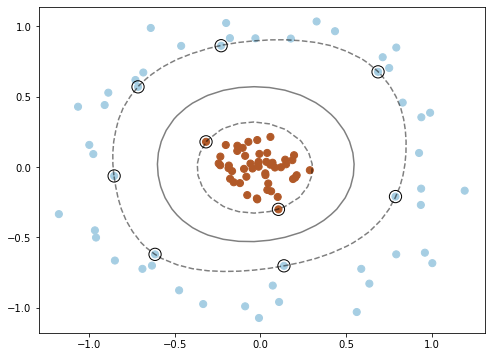

In [90]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors="none");

In [63]:
clf.support_vectors_[:, 0]

array([ 0.66652131,  0.95266281,  0.28159866, -0.06354539,  0.5833521 ,
       -0.70477127,  0.39640631, -0.52704058, -0.07752061, -0.12335276,
        0.15753453])

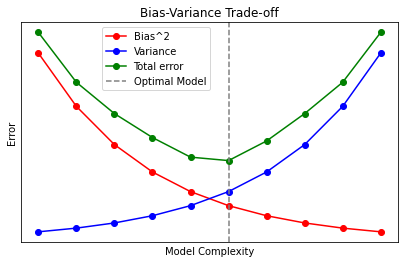

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the general trend lines for bias and variance
model_complexity = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
values = np.linspace(1,4,10)
variance = np.exp(values)
bias = variance[::-1]
b_v =[60.59815003314424,
 46.12128399815321,
 37.031624894526125,
 30.085536923187668,
 24.39191609514989,
 23.39191609514989,
 29.085536923187668,
 37.031624894526125,
 46.12128399815321,
 60.59815003314424]

# Plot lines for bias and variance
plt.plot(model_complexity, bias, marker='o', label='Bias^2', color='red')
plt.plot(model_complexity, variance, marker='o', label='Variance', color='blue')
plt.plot(model_complexity, b_v, marker='o', label='Total error', color='green')
plt.axvline(x=6, color='grey', linestyle='--', label='Optimal Model')

plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off')
plt.legend(loc='upper left',  bbox_to_anchor=(0.2, 1))
plt.grid(True)
plt.tight_layout()
plt.xticks([])
plt.yticks([])
plt.show()
